In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

분석 데이터는 캐글에서 제공하는 stroe forecasting 데이터입니다

평소에 관심있던 시계열 데이터를 eda해보고 싶어 해당 데이터를 선택하게 되었습니다.

평소에 eda를 해도 시각화로는 큰 도움을 얻지 못한 것 같아서, 시각화를 통해 데이터를 이해하는 것을 목표로 하고 있습니다.

분석을 통해 얻은 결과는 oil prcie가 생각보다 유의미하지 못한 영향을 준다는 것을 알게 되었고, 특히 각 store마다의 상품군이 중요한 변수로서 역할을 하고 있음을 알게 되었습니다. 

# 데이터 확인

### oil 

In [ ]:
# 파생변수로 쓸 수 있을듯
oil_data = pd.read_csv('/content/drive/MyDrive/alt 캐글 스터디/상점 시계열 EDA/oil.csv')
oil_data

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [ ]:
# 중복되는 날짜는 없는데 빈 날짜는 있음. >> 주말없음
# 2013-01-01 부터 2017-08-31 까지 데이터 있음.
len(oil_data.date.unique())

1218

In [ ]:
# 결측치 43개
oil_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [ ]:
# 비슷한 날짜에 결측치 생김. 연속적인 결측치는 없음. 
oil_data[oil_data.dcoilwtico.isnull()]

,date,dcoilwtico
0,2013-01-01,NaN
14,2013-01-21,NaN
34,2013-02-18,NaN
63,2013-03-29,NaN
104,2013-05-27,NaN
132,2013-07-04,NaN
174,2013-09-02,NaN
237,2013-11-28,NaN
256,2013-12-25,NaN
261,2014-01-01,NaN


In [ ]:
# 이상치는 없어보임.
oil_data.describe()

,dcoilwtico
count,1175.000000
mean,67.714366
std,25.630476
min,26.190000
25%,46.405000
50%,53.190000
75%,95.660000
max,110.620000


### store

In [ ]:
store_data = pd.read_csv('/content/drive/MyDrive/alt 캐글 스터디/상점 시계열 EDA/stores.csv')
store_data.head()
# 54개 스토어
# cluster is a grouping of similar stores.

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [ ]:
# 결측치 없음
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [ ]:
# type 5개. 뭘 의미?
store_data.type.unique()

array(['D', 'B', 'C', 'E', 'A'], dtype=object)

In [ ]:
# cluster 17개
store_data.cluster.unique()

array([13,  8,  9,  4,  6, 15,  7,  3, 12, 16,  1, 10,  2,  5, 11, 14, 17])

### transaction

In [ ]:
transaction_data = pd.read_csv('/content/drive/MyDrive/alt 캐글 스터디/상점 시계열 EDA/transactions.csv')
transaction_data

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [ ]:
# store 개수가 일정하지않음.
# 주말 데이터도 포함됨(값도 존재).
transaction_data.groupby(transaction_data['date']).count()

,store_nbr,transactions
date,,
2013-01-01,1,1
2013-01-02,46,46
2013-01-03,46,46
2013-01-04,46,46
2013-01-05,46,46
...,...,...
2017-08-11,54,54
2017-08-12,54,54
2017-08-13,54,54


In [ ]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [ ]:
1682 * 54

90828

### holiday event

In [ ]:
holiday_data = pd.read_csv('/content/drive/MyDrive/alt 캐글 스터디/상점 시계열 EDA/holidays_events.csv')
holiday_data.tail()

,date,type,locale,locale_name,description,transferred
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False
349,2017-12-26,Additional,National,Ecuador,Navidad+1,False


In [ ]:
holiday_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


### train set

In [ ]:
# onpromotion means promoting number of items of particular family of product
train_data = pd.read_csv('/content/drive/MyDrive/alt 캐글 스터디/상점 시계열 EDA/train.csv')
train_data

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [ ]:
train_data.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [ ]:
len(train_data.family.unique())

33

### test set

In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/alt 캐글 스터디/상점 시계열 EDA/test.csv')
test_data

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [ ]:
len(test_data.store_nbr.unique())

54

In [ ]:
len(test_data.family.unique())

33

In [ ]:
#16일 동안 54개의 상점에서 33개의 품목에 대한 sales를 예측(주말포함)
16 * 54 * 33

28512

In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/alt 캐글 스터디/상점 시계열 EDA/sample_submission.csv')
submission

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0
...,...,...
28507,3029395,0.0
28508,3029396,0.0
28509,3029397,0.0
28510,3029398,0.0


# FE

### datetime 처리

In [ ]:
oil_data['date'] = pd.to_datetime(oil_data.date, format='%Y-%m-%d')
#oil_data.set_index('date', inplace = True)
oil_data.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [ ]:
transaction_data['date'] = pd.to_datetime(transaction_data.date, format='%Y-%m-%d')
#transaction_data.set_index('date', inplace = True)
transaction_data.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [ ]:
holiday_data['date'] = pd.to_datetime(holiday_data.date, format='%Y-%m-%d')
#holiday_data.set_index('date', inplace = True)
holiday_data.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [ ]:
train_data['date'] = pd.to_datetime(train_data.date, format='%Y-%m-%d')
#train_data.set_index('date', inplace = True)
train_data.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [ ]:
test_data['date'] = pd.to_datetime(test_data.date, format='%Y-%m-%d')
#test_data.set_index('date', inplace = True)
test_data.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


### 전처리

In [ ]:
oil_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1218 entries, 2013-01-01 to 2017-08-31
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dcoilwtico  1175 non-null   float64
dtypes: float64(1)
memory usage: 19.0 KB


### train_set fe

In [ ]:
train_data

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.000,0
2013-01-01,1,1,BABY CARE,0.000,0
2013-01-01,2,1,BEAUTY,0.000,0
2013-01-01,3,1,BEVERAGES,0.000,0
2013-01-01,4,1,BOOKS,0.000,0
...,...,...,...,...,...
2017-08-15,3000883,9,POULTRY,438.133,0
2017-08-15,3000884,9,PREPARED FOODS,154.553,1
2017-08-15,3000885,9,PRODUCE,2419.729,148


In [ ]:
automotive = train_data[train_data.family == 'AUTOMOTIVE']
automotive = automotive.reset_index()

In [ ]:
automotive

,index,id,date,store_nbr,family,sales,onpromotion
0,0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,33,33,2013-01-01,10,AUTOMOTIVE,0.0,0
2,66,66,2013-01-01,11,AUTOMOTIVE,0.0,0
3,99,99,2013-01-01,12,AUTOMOTIVE,0.0,0
4,132,132,2013-01-01,13,AUTOMOTIVE,0.0,0
...,...,...,...,...,...,...,...
90931,3000723,3000723,2017-08-15,54,AUTOMOTIVE,8.0,0
90932,3000756,3000756,2017-08-15,6,AUTOMOTIVE,7.0,0
90933,3000789,3000789,2017-08-15,7,AUTOMOTIVE,5.0,0
90934,3000822,3000822,2017-08-15,8,AUTOMOTIVE,4.0,0


In [ ]:
automotive1 = automotive[automotive.store_nbr == 1]

In [ ]:
# 주말인지 아닌지 여부도 feature에 추가하면 좋을듯.
train_data['date'] = pd.to_datetime(train_data['date'])
train_data['weekday'] = train_data['date'].apply(extract_weekday)
train_data['year'] = train_data['date'].apply(extract_year)
train_data['month'] = train_data['date'].apply(extract_month)

test_data['date'] = pd.to_datetime(test_data['date'])
test_data['weekday'] = test_data['date'].apply(extract_weekday)
test_data['year'] = test_data['date'].apply(extract_year)
test_data['month'] = test_data['date'].apply(extract_month)

# 데이터 시각화

In [ ]:
sns.set(rc = {'figure.figsize':(20,8)})


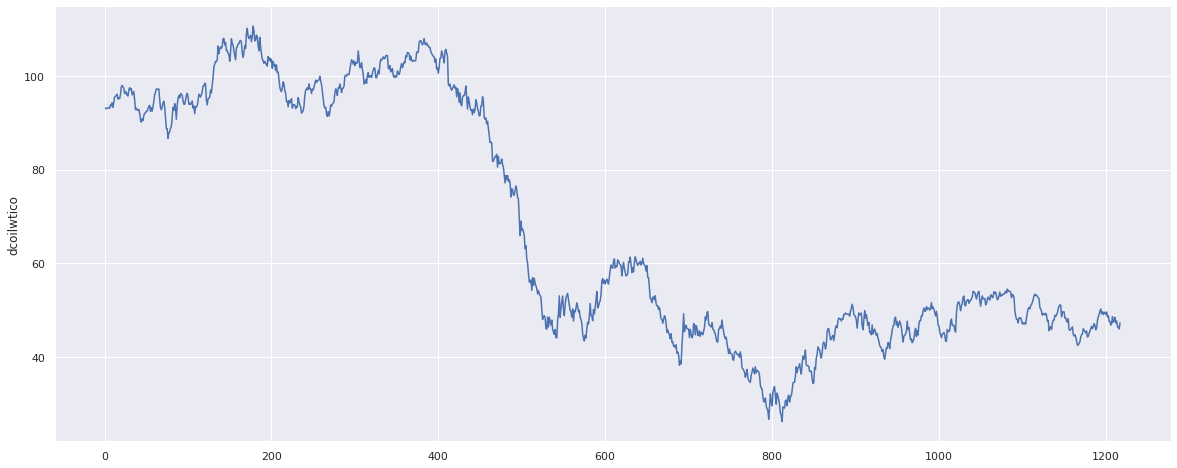

In [ ]:
# oil price lineplot
sns.lineplot(data = oil_data.dcoilwtico)

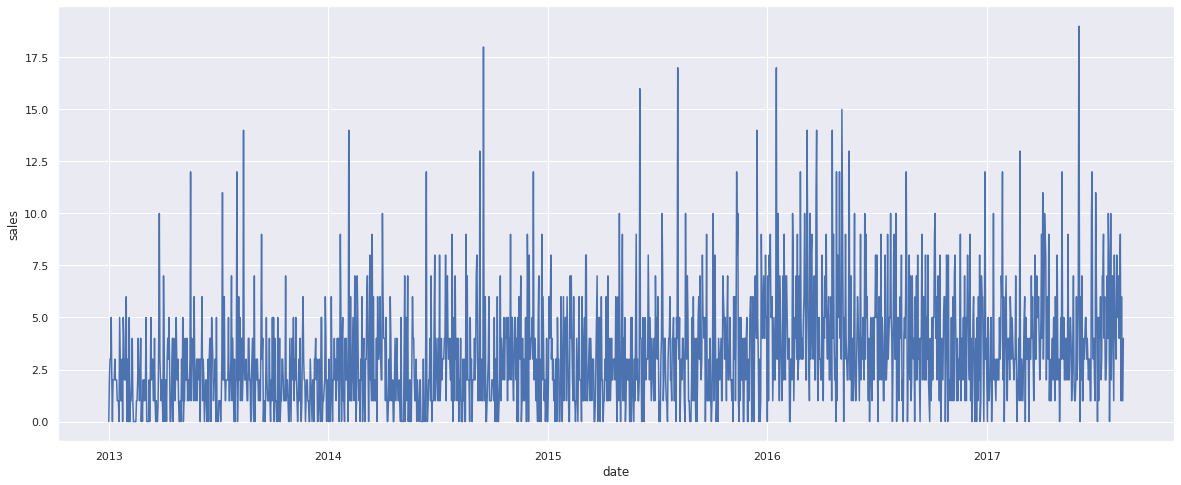

In [ ]:
# 품목 판매량 lineplot(예시 1)
sns.lineplot(data = automotive1.sales)

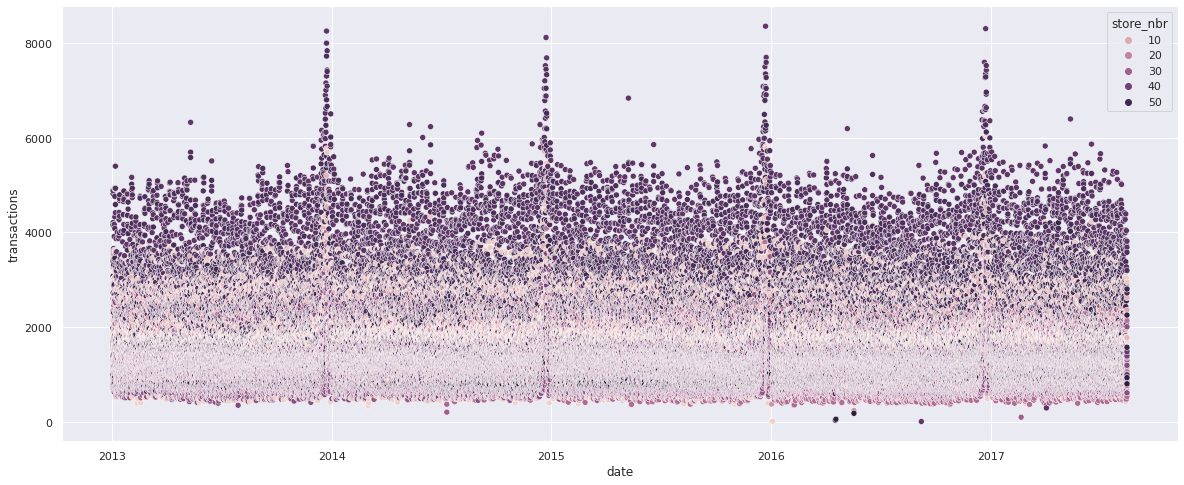

In [ ]:
# store 별로 거래량 우선순위가 유지되는 경향이 있음. >> store 문제이지 다른 요인은 아닐듯.
sns.scatterplot(x = 'date', y = 'transactions', hue = 'store_nbr', data = transaction_data)

In [ ]:
grid = sns.FacetGrid(data=automotive, row='store_nbr')
grid.map(sns.scatterplot, 'date', 'sales')

<function matplotlib.pyplot.show(*args, **kw)>

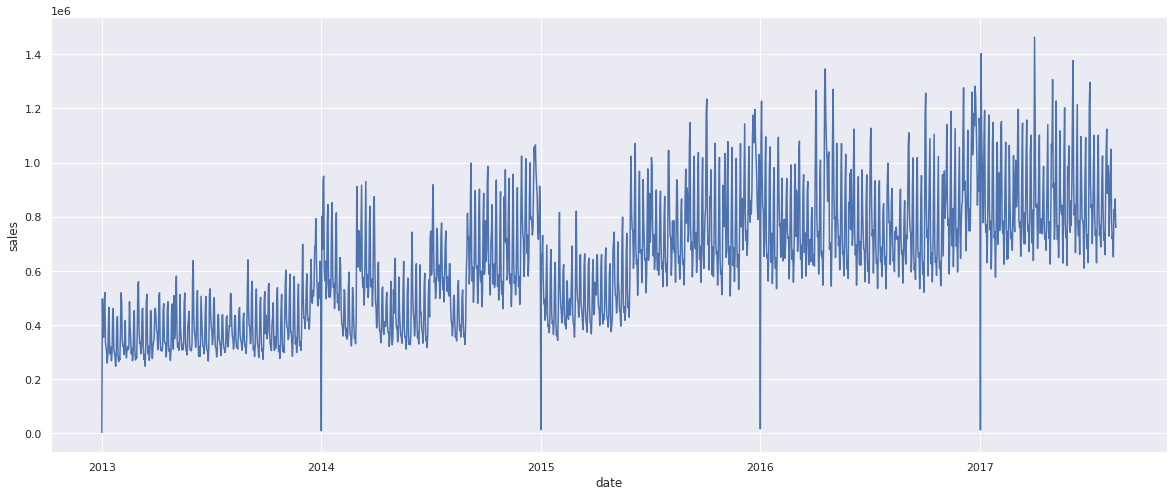

In [ ]:
# 전체 store 합계 판매량 lineplot
# 매년 특정 날짜에 0값이 존재하는 것을 파악할 수 있음.
# oil price와 크게 상관관계가 없는 것처럼 보임.

sales_sum = train_data.groupby(['date']).agg({"sales" : "sum"}).reset_index()
sales_sum.sales = (sales_sum.sales.round())
plt.plot(sales_sum.date, sales_sum.sales)
plt.xlabel("date")
plt.ylabel("sales")
plt.show()

# 데이터 분석

In [ ]:
# 파생변수를 어떻게 설정하는가가 중요할듯.

In [ ]:
df_data = pd.concat([train_data, test_data], sort=True)
df_data = df_data.merge(store_data, how="left", on='store_nbr')   
df_data = df_data.merge(oil_data, how="left", on='date')      
df_data = df_data.merge(transaction_data, how="left", on=['date','store_nbr'])  
df_data = df_data.merge(holiday_data,on='date',how='left')
df_data = df_data.rename(columns={'type_x' : 'store_type','type_y':'holiday_type'})
df_data

In [ ]:
# merge data 저장
df_data.to_csv('/content/drive/MyDrive/alt 캐글 스터디/mergedata.csv')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/alt 캐글 스터디/mergedata.csv')
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (13,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,date,family,id,onpromotion,sales,store_nbr,city,state,store_type,cluster,dcoilwtico,transactions,holiday_type,locale,locale_name,description,transferred
0,0,2013-01-01,AUTOMOTIVE,0,0,0.0,1,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,BABY CARE,1,0,0.0,1,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,BEAUTY,2,0,0.0,1,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,BEVERAGES,3,0,0.0,1,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,BOOKS,4,0,0.0,1,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3082855,3082855,2017-08-31,POULTRY,3029395,1,NaN,9,Quito,Pichincha,B,6,47.26,NaN,NaN,NaN,NaN,NaN,NaN
3082856,3082856,2017-08-31,PREPARED FOODS,3029396,0,NaN,9,Quito,Pichincha,B,6,47.26,NaN,NaN,NaN,NaN,NaN,NaN
3082857,3082857,2017-08-31,PRODUCE,3029397,1,NaN,9,Quito,Pichincha,B,6,47.26,NaN,NaN,NaN,NaN,NaN,NaN
3082858,3082858,2017-08-31,SCHOOL AND OFFICE SUPPLIES,3029398,9,NaN,9,Quito,Pichincha,B,6,47.26,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 품목에 따라서 상관관계가 많이 달라짐. automotive는 onpromotion의 영향이 작고, seafood는 영향이 큰 것을 알 수 있음. 
# 근데 가게마다도 많이 다르고, onpromotion이 없을 수도 있음. 
# 진짜 모델을 각각 따로 돌리는게 맞나?
# 전부 다 따로 돌리면 store 54 * family 33 = 1782 너무 많음. 
df1 = df[(df['family'] == 'SEAFOOD')]
df1

,Unnamed: 0,date,family,id,onpromotion,sales,store_nbr,city,state,store_type,cluster,dcoilwtico,transactions,holiday_type,locale,locale_name,description,transferred
32,32,2013-01-01,SEAFOOD,32,0,0.0,1,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
65,65,2013-01-01,SEAFOOD,65,0,0.0,10,Quito,Pichincha,C,15,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
98,98,2013-01-01,SEAFOOD,98,0,0.0,11,Cayambe,Pichincha,B,6,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
131,131,2013-01-01,SEAFOOD,131,0,0.0,12,Latacunga,Cotopaxi,C,15,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
164,164,2013-01-01,SEAFOOD,164,0,0.0,13,Latacunga,Cotopaxi,C,15,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3082727,3082727,2017-08-31,SEAFOOD,3029267,0,NaN,54,El Carmen,Manabi,C,3,47.26,NaN,NaN,NaN,NaN,NaN,NaN
3082760,3082760,2017-08-31,SEAFOOD,3029300,1,NaN,6,Quito,Pichincha,D,13,47.26,NaN,NaN,NaN,NaN,NaN,NaN
3082793,3082793,2017-08-31,SEAFOOD,3029333,1,NaN,7,Quito,Pichincha,D,8,47.26,NaN,NaN,NaN,NaN,NaN,NaN
3082826,3082826,2017-08-31,SEAFOOD,3029366,1,NaN,8,Quito,Pichincha,D,8,47.26,NaN,NaN,NaN,NaN,NaN,NaN
